LOGISTIC REGRESSION - TITANIC

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

In [28]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
X.shape, y.shape

((891, 8), (891,))

In [29]:
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept, X), axis=1)

In [30]:
val_size = 0.2
test_size = 0.125
random_state = 0
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [31]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

In [32]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def predict(X, theta):
    dot_product = X.dot(theta)
    y_hat = sigmoid(dot_product)

    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)

    return (
        -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
    ).mean()

def compute_gradient(X, y, y_hat):
    return X.T.dot(y_hat - y) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient
    
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [33]:
lr = 0.01
epochs = 100
batch_size = 8
np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [34]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i+batch_size]
        y_i = y_train[i: i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        train_batch_losses.append(train_loss)
        
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_losses = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_losses = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_accs = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_accs = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_losses)
    val_losses.append(val_batch_losses)
    train_accs.append(train_batch_accs)
    val_accs.append(val_batch_accs)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_losses :.3f}\tValidation loss: {val_batch_losses :.3f}')


EPOCH 1:	Training loss: 0.823	Validation loss: 0.853

EPOCH 2:	Training loss: 0.748	Validation loss: 0.783

EPOCH 3:	Training loss: 0.686	Validation loss: 0.726

EPOCH 4:	Training loss: 0.634	Validation loss: 0.680

EPOCH 5:	Training loss: 0.593	Validation loss: 0.644

EPOCH 6:	Training loss: 0.560	Validation loss: 0.617

EPOCH 7:	Training loss: 0.535	Validation loss: 0.595

EPOCH 8:	Training loss: 0.515	Validation loss: 0.579

EPOCH 9:	Training loss: 0.500	Validation loss: 0.566

EPOCH 10:	Training loss: 0.487	Validation loss: 0.555

EPOCH 11:	Training loss: 0.477	Validation loss: 0.547

EPOCH 12:	Training loss: 0.469	Validation loss: 0.540

EPOCH 13:	Training loss: 0.462	Validation loss: 0.534

EPOCH 14:	Training loss: 0.457	Validation loss: 0.530

EPOCH 15:	Training loss: 0.452	Validation loss: 0.526

EPOCH 16:	Training loss: 0.448	Validation loss: 0.522

EPOCH 17:	Training loss: 0.445	Validation loss: 0.519

EPOCH 18:	Training loss: 0.442	Validation loss: 0.517

EPOCH 19:	Training

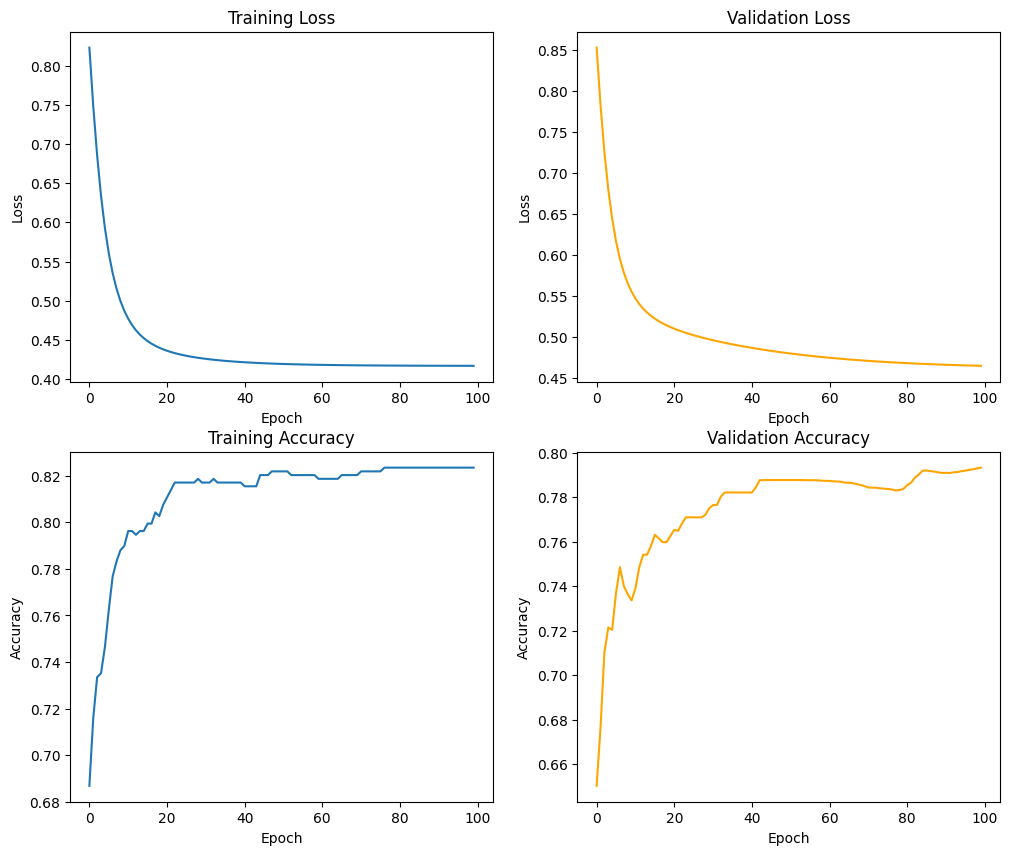

In [35]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses, color='orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs, color='orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [36]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print ('Evaluation on validation and test set :')
print (f'Val Accuracy : {val_set_acc}')
print (f'Test Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Val Accuracy : 0.7932960893854749
Test Accuracy : 0.7528089887640449


SENTIMENT ANALYSIS

In [37]:
import pandas as pd
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [38]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col='id'
)

df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [39]:
def text_normalize(text):
    #Retweet old acronym "RT" removal
    text = re.sub(r'`RT[\s]+', '', text)

    #Hyperlink removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    #Hashtag removal
    text = re.sub(r'#', '', text)

    #Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    #Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [40]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1
        
    return freqs

In [41]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros((3))
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 1)]
        X[2] += freqs[(token, 0)]

In [42]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

In [43]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [44]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def predict(X, theta):
    dot_product = X.dot(theta)
    y_hat = sigmoid(dot_product)

    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1-1e-7)

    return (
        -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
    ).mean()

def compute_gradient(X, y, y_hat):
    return X.T.dot(y_hat - y) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient
    
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [ ]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print ('Evaluation on validation and test set :')
print (f'Val Accuracy : {val_set_acc}')
print (f'Test Accuracy : {test_set_acc}')